In [120]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import keras
import tensorflow as tf
import glob

classes = 17

def get_im(path):
    # Load as grayscale
    img = cv2.imread(path, 0)
    return img

# to show image
def show_img(img):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.show()

def load_train():
    X_train = []
    y_train = []
    p = "/root/alpha/git/mine/tensor/dataset/train"
    for j in range(1,classes):
        path = os.path.join(p , str(j)+"/*")
        files = glob.glob(path)
        for fl in files:
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j-1)

    return X_train, y_train

def load_test():
    X_train = []
    y_train = []
    p = "/root/alpha/git/mine/tensor/dataset/test"
    for j in range(1,classes):
        path = os.path.join(p , str(j)+"t/*")
        files = glob.glob(path)
        for fl in files:
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j-1)

    return X_train, y_train

lx,ly = load_train()
ltx , lty = load_test()

x = np.array(lx)
y = np.array(ly)
ty = np.array(lty)
tx = np.array(ltx)
x = x.astype(float) / 255
tx = tx.astype(float) / 255

In [155]:
def sigmoid(x):
    sig = 1.0/(1+ np.exp(-x))
#     print(sig)
    return sig

def sigmoid_derivative(x):
    return x * (1.0 - x)

In [199]:
inner = 5
outer = 16

In [189]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input  = x
        self.w      = np.random.rand(self.input.shape[1],inner) 
        self.v      = np.random.rand(inner,outer)                 
        self.y      = y
        self.output = np.zeros(outer)
        self.dv = 0
        self.dw = 0
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input,self.w))
#         self.layer1 = tf.nn.sigmoid(np.dot(self.input,self.w), name ='sigmoid') 
        self.output = sigmoid(np.dot(self.layer1,self.v))
        
    def backPropagation(self):
        self.dv = np.dot(self.layer1.T,(self.y-self.output)*sigmoid_derivative(self.output))
        self.dw = np.dot(self.input.T,(np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.v.T) * sigmoid_derivative(self.layer1)))
        
        self.w += self.dw
        self.v += self.dv

In [255]:
nn = NeuralNetwork(inp,arr)
np.dot(nn.input,nn.w).shape
nn.feedforward()
nn.backPropagation()
# sigmoid(np.dot(nn.input,nn.w))
sigmoid_derivative(nn.output).shape

(270, 16)

In [238]:
inp = np.reshape(x,(270,900))
inp[2]

array([0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99215686, 0.99607843, 0.98823529, 0.94901961, 0.87843137,
       0.90196078, 0.98431373, 0.99215686, 1.        , 0.99607843,
       0.99607843, 1.        , 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99215686, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 0.99215686, 0.96078431, 0.65882353, 0.43137255,
       0.49411765, 0.84313725, 0.98431373, 0.99607843, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 1.        , 0.99607843, 0.99607843, 0.99215686,
       0.99215686, 0.96862745, 0.67058824, 0.58431373, 0.81568

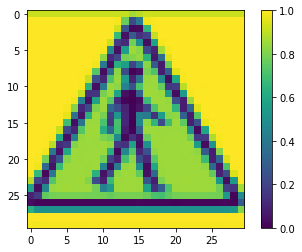

In [237]:
tx.shape
plt.figure()
plt.imshow(np.reshape(inp[15],(30,30)))
plt.colorbar()
plt.grid(False)
plt.show()

In [227]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12

In [92]:
arr = np.empty((0,16), float)
for i in range(270):
    k = np.zeros(16)
    k = np.reshape(k,(1,16))
    k[0][y[i]] = 1
#     print(k)
    arr = np.append(arr, k, axis=0)
    

In [93]:
arr[160]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [171]:
nn = NeuralNetwork(inp,arr)

for i in range(1):
    print("Epoch: "+str(i))
    nn.feedforward()
    nn.backPropagation()
#     print(nn.dw)
#     print(nn.dv)

nn.output

Epoch: 0


array([[0.85971234, 0.77714826, 0.93909373, ..., 0.96609264, 0.96625029,
        0.8780415 ],
       [0.85971234, 0.77714826, 0.93909373, ..., 0.96609264, 0.96625029,
        0.8780415 ],
       [0.85971234, 0.77714826, 0.93909373, ..., 0.96609264, 0.96625029,
        0.8780415 ],
       ...,
       [0.85971234, 0.77714826, 0.93909373, ..., 0.96609264, 0.96625029,
        0.8780415 ],
       [0.85971234, 0.77714826, 0.93909373, ..., 0.96609264, 0.96625029,
        0.8780415 ],
       [0.85971234, 0.77714826, 0.93909373, ..., 0.96609264, 0.96625029,
        0.8780415 ]])

In [265]:
X = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]])
Y = np.array([[0],[1],[1],[0]])
nn = NeuralNetwork(X,Y)

for i in range(1500):
    nn.feedforward()
    nn.backPropagation()


nn.output

array([[0.01084954, 0.01067893, 0.0101161 , 0.00959802, 0.00995365,
        0.01094447, 0.01025066, 0.00993572, 0.01055877, 0.01018769,
        0.00953612, 0.00917363, 0.0111585 , 0.01085908, 0.01021209,
        0.0093515 ],
       [0.98535397, 0.98530893, 0.9852185 , 0.98534547, 0.98545905,
        0.9857668 , 0.9849459 , 0.98572953, 0.98514174, 0.98555147,
        0.98533525, 0.9848729 , 0.98576046, 0.98565126, 0.98539772,
        0.98517862],
       [0.98759971, 0.98761806, 0.9874765 , 0.98769491, 0.98746135,
        0.98796195, 0.98712175, 0.98790971, 0.98729987, 0.98759049,
        0.98743808, 0.9869902 , 0.98776462, 0.98785278, 0.98760594,
        0.9872601 ],
       [0.01542359, 0.01565073, 0.01603368, 0.0159833 , 0.01574457,
        0.01490773, 0.01619153, 0.01549017, 0.01582712, 0.01567145,
        0.01610232, 0.01677778, 0.01501096, 0.01522716, 0.01564869,
        0.01637519]])

In [25]:
k = np.array([[[0, 1],[2, 3],[4, 5]],
             [[0, 1],[2, 3],[4, 5]]])
k.shape

(2, 3, 2)

In [26]:
np.reshape(k,(2,1,6))

array([[[0, 1, 2, 3, 4, 5]],

       [[0, 1, 2, 3, 4, 5]]])

In [10]:
a = NeuralNetwork(5,10)

In [20]:
input = np.array([[1,2,3],[2,1,3]])

In [31]:
input.shape

(2, 3)

In [40]:
w = np.random.rand(3,2)

In [46]:
w = np.array([[1,0],[0,1],[1,1]])

In [47]:
w

array([[1, 0],
       [0, 1],
       [1, 1]])

In [66]:
l1

array([[4, 5],
       [5, 4]])

In [59]:
l1 = np.dot(input,w)

In [71]:
np.dot(l1.T,[1,2])

array([14, 13])

In [65]:
d

array([[20, 25],
       [25, 20]])

In [57]:
a = np.array([[1,2],[1,2]]) 
b = np.array([[11,12,2],[13,14,1]]) 
np.dot(a,b)

array([[37, 40,  4],
       [37, 40,  4]])